<a href="https://colab.research.google.com/github/sdhar2020/Visualization-Exploratory-Analysis/blob/master/Fivethirtyeight_College_Major_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The data used here is behind the story [The Economic Guide To Picking A College Major](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/). A few simple visualizations are presented using the fivethirtyeight style

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
recent_grads = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv")
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [80]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,593,237,410,87,0.104946,22000,20000,22000,288,338,192


In [81]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [82]:
print(recent_grads.shape[0])
print(recent_grads.dropna().shape[0])

recent_grads = recent_grads.dropna()

173
172


## Share of Women versus Unemployment

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5674a4c18>,
      dtype=object)

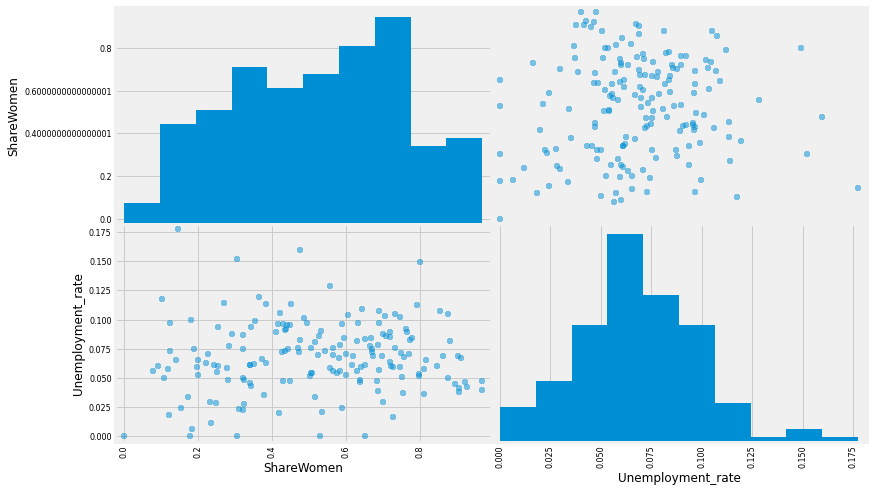

In [83]:

from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[["ShareWomen","Unemployment_rate"]], figsize = (12,8),marker='+')

# Scatter matrix

> Indented block



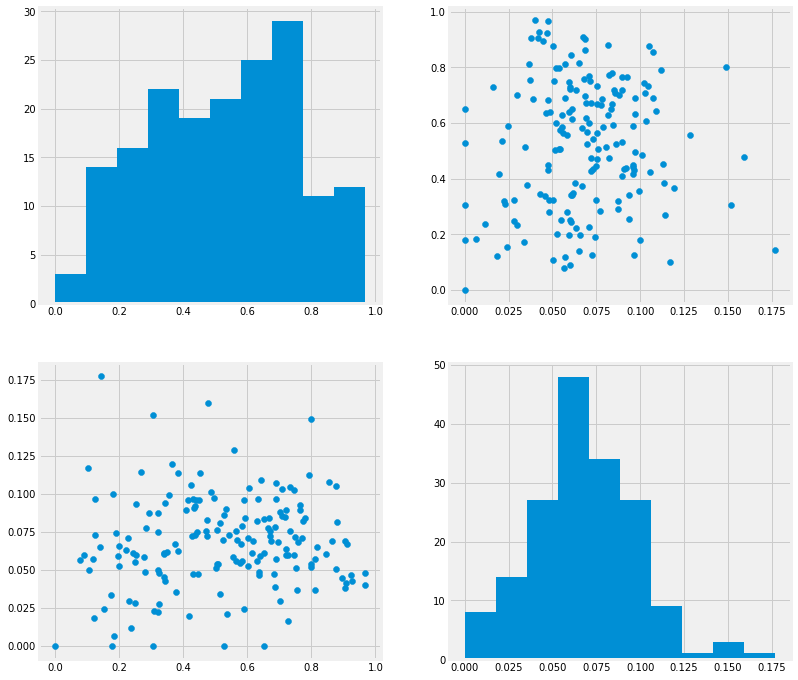

In [84]:
# First, we need to create a Figure instance and create 4 axes, corresponding to each subplot.
fig_rg = plt.figure(figsize=(12,12))
ax1_rg = fig_rg.add_subplot(2,2,1)
ax2_rg = fig_rg.add_subplot(2,2,2)
ax3_rg = fig_rg.add_subplot(2,2,3)
ax4_rg = fig_rg.add_subplot(2,2,4)

# Top left plot
ax1_rg.hist(recent_grads["ShareWomen"])

# Top right plot
ax2_rg.scatter(recent_grads["Unemployment_rate"], recent_grads["ShareWomen"])

# Bottom left plot
ax3_rg.scatter(recent_grads["ShareWomen"], recent_grads["Unemployment_rate"])

# Bottom right plot
ax4_rg.hist(recent_grads["Unemployment_rate"])

plt.show()

# Scatter matrix, steps 2 and 3

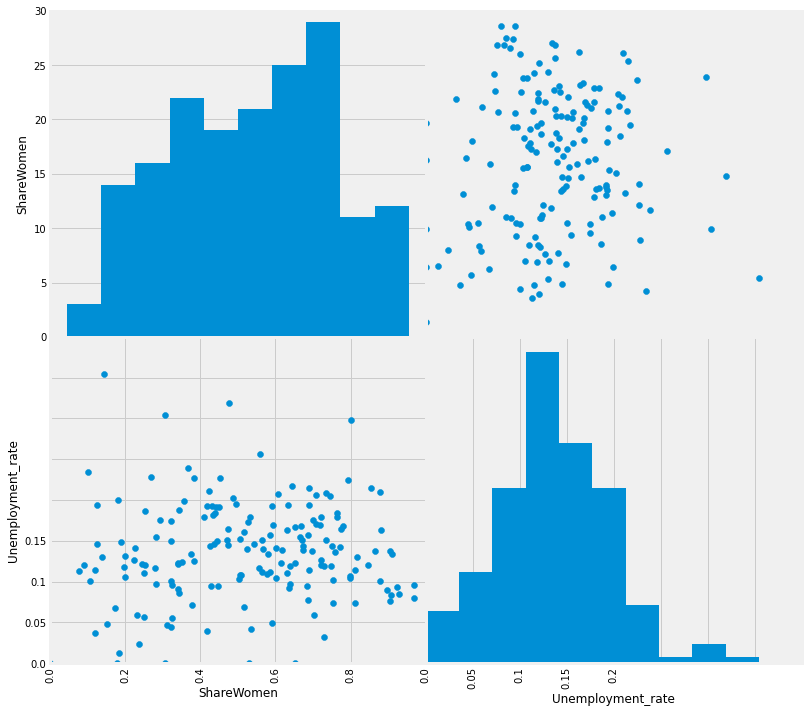

In [85]:
# First, we need to create a Figure instance and create 4 axes, corresponding to each subplot.
fig_rg = plt.figure(figsize=(12,12))
ax1_rg = fig_rg.add_subplot(2,2,1)
ax2_rg = fig_rg.add_subplot(2,2,2)
ax3_rg = fig_rg.add_subplot(2,2,3)
ax4_rg = fig_rg.add_subplot(2,2,4)

# Top left plot
ax1_rg.hist(recent_grads["ShareWomen"])
# Top right plot
ax2_rg.scatter(recent_grads["Unemployment_rate"], recent_grads["ShareWomen"])
# Bottom left plot
ax3_rg.scatter(recent_grads["ShareWomen"], recent_grads["Unemployment_rate"])
# Bottom right plot
ax4_rg.hist(recent_grads["Unemployment_rate"])

# Top left plot
ax1_rg.set_ylabel("ShareWomen")
ax1_rg.get_xaxis().tick_top()
ax1_rg.get_xaxis().set_visible(False)
ax1_rg.get_yaxis().tick_left()
ax1_rg.set_ylim(0,30)
ax1_rg.set_yticklabels([0, 5, 10, 15, 20, 25, 30])

# Top right plot
ax2_rg.get_yaxis().set_visible(False)
ax2_rg.get_xaxis().set_visible(False)
ax2_rg.set_xlim(0.0, 0.20)

# Bottom left plot
ax3_rg.set_xlabel("ShareWomen")
ax3_rg.set_ylabel("Unemployment_rate")
ax3_rg.get_xaxis().tick_bottom()
ax3_rg.get_yaxis().tick_left()
ax3_rg.set_ylim(0.00, 0.20)
ax3_rg.set_yticklabels([0.00, 0.05, 0.10, 0.15])
ax3_rg.set_xlim(0.0, 1.0)
ax3_rg.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8], rotation=90)

# Bottom right plot
ax4_rg.set_xlabel("Unemployment_rate")
ax4_rg.get_yaxis().set_visible(False)
ax4_rg.get_xaxis().tick_bottom()
ax4_rg.set_xlim(0.0, 0.20)
ax4_rg.set_xticklabels([0.00, 0.05, 0.10, 0.15, 0.20], rotation=90)

# Remove space between sub plots.
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

# Grouped bar plots, part 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


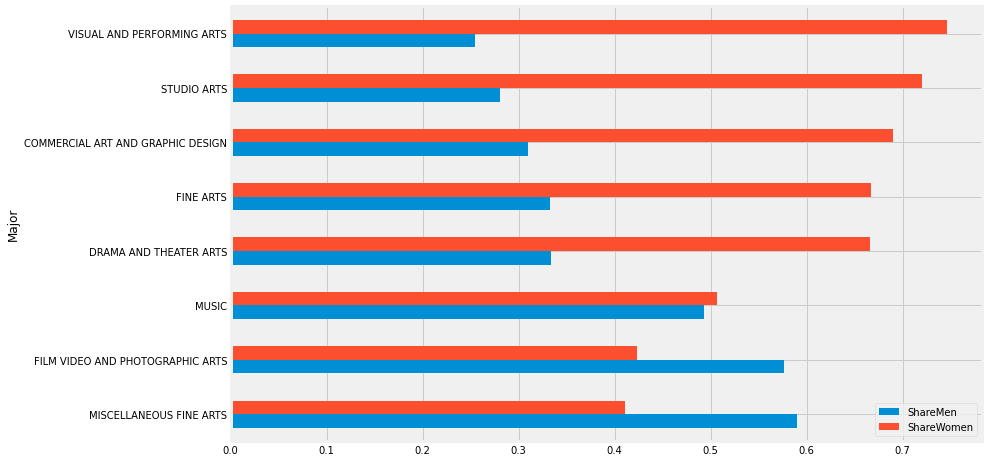

In [86]:
# Pandas generated grouped bar plot
recent_grads["ShareMen"] = recent_grads["Men"] / recent_grads["Total"]
arts = recent_grads[recent_grads["Major_category"] == "Arts"]
arts.set_index("Major", inplace=True)
arts.sort_values("ShareMen",axis=0,ascending=False,inplace=True)
arts[["ShareMen", "ShareWomen"]].plot(kind='barh',figsize=(12,8))

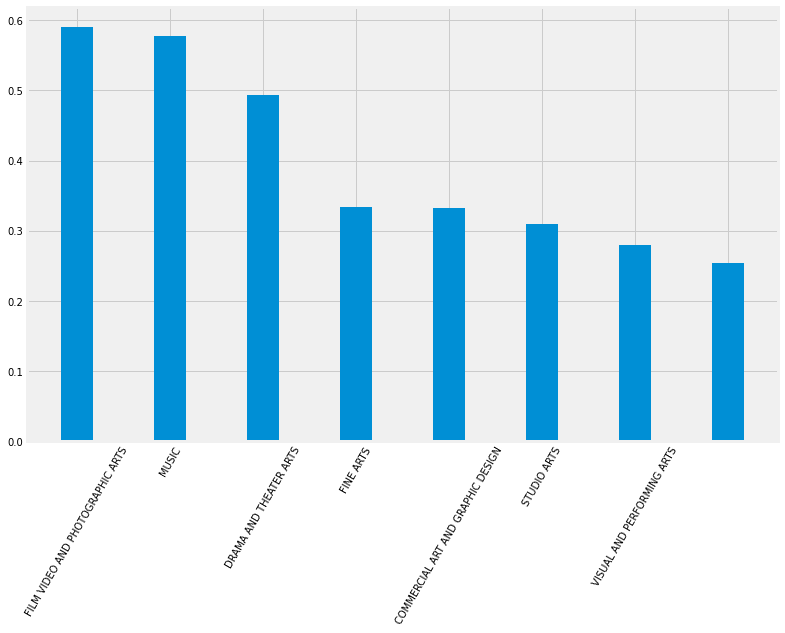

In [87]:
import numpy as np
recent_grads["ShareMen"] = recent_grads["Men"] / recent_grads["Total"]

# Create figure instance and subplot
fig_rg2 = plt.figure(figsize=(12,8))
ax1_rg2 = fig_rg2.add_subplot(1,1,1)

major_names = arts.index.tolist()
locs = np.arange(len(major_names))
width = 0.35

men_proportions = arts["ShareMen"].tolist()
bar_1 = ax1_rg2.bar(locs, men_proportions, width)
ax1_rg2.set_xticklabels(major_names, rotation=60)

plt.show()

# Arts Major comparison

> Indented block



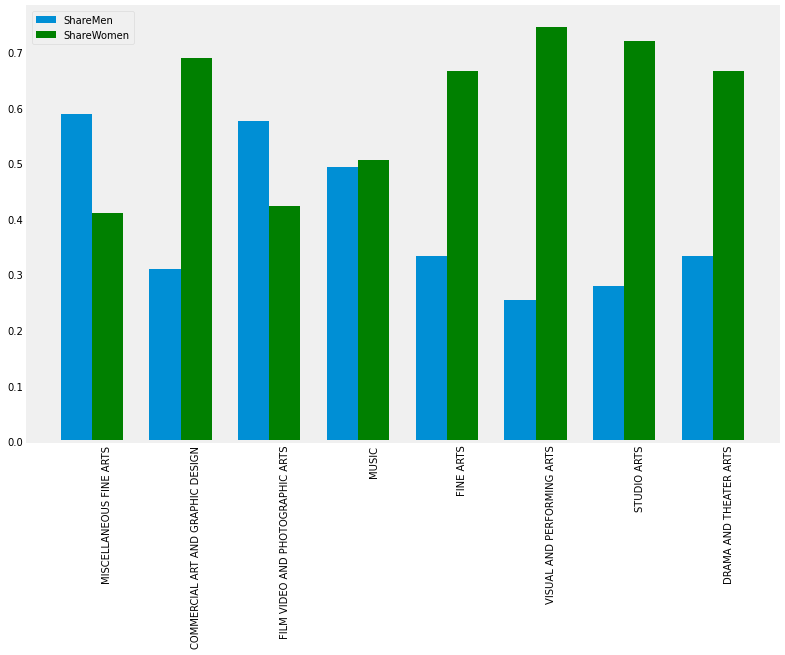

In [88]:
## Part 1

import numpy as np
recent_grads["ShareMen"] = recent_grads["Men"] / recent_grads["Total"]

fig_rg2 = plt.figure(figsize=(12,8))
ax1_rg2 = fig_rg2.add_subplot(1,1,1)

arts = recent_grads[recent_grads["Major_category"] == "Arts"]
major_names = arts["Major"].tolist()
locs = np.arange(len(major_names))
width = 0.35

# List representation of these columns
men_proportions = arts["ShareMen"].tolist()
women_proportions = arts["ShareWomen"].tolist()

# Generate both the bars
bar_1 = ax1_rg2.bar(locs, men_proportions, width)
ax1_rg2.set_xticklabels(major_names, rotation=90)

## Part 2

# Each value offset by `0.35`
offset_locs = locs + width

# Set of bars for `ShareWomen`
bar_2 = ax1_rg2.bar(offset_locs, women_proportions, width, color="green")

# Align x labels with bars better
ax1_rg2.set_xticks(offset_locs)

# Create a legend
plt.legend((bar_1, bar_2), ("ShareMen", "ShareWomen"), loc="upper left")

# Display the background grid
plt.grid()
plt.show()

# Comparing across degree categories

In [89]:
women_degrees = pd.read_csv('https://raw.githubusercontent.com/johnashu/datacamp/master/percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

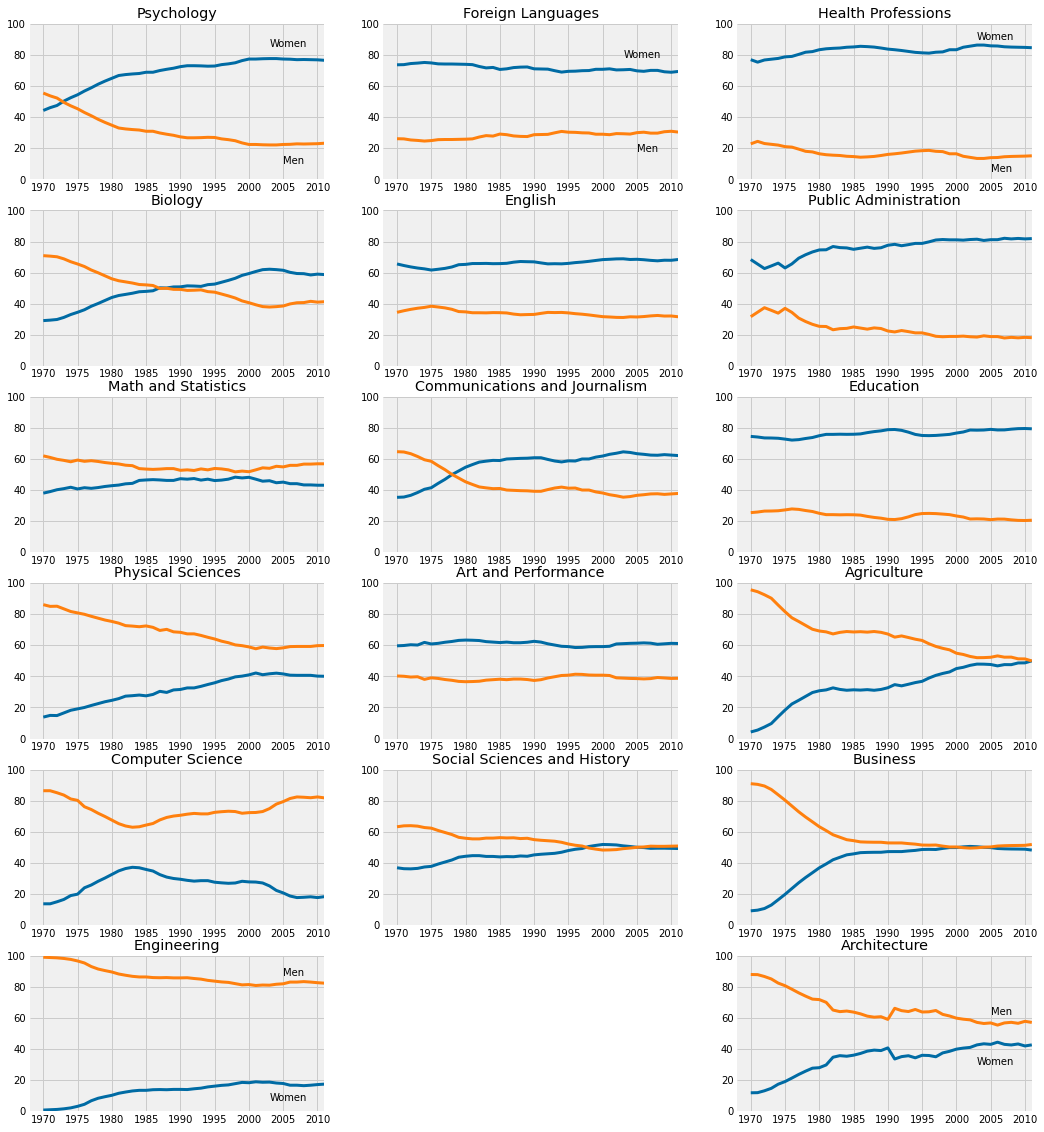

In [90]:
fig = plt.figure(figsize=(16, 20))

## Generate first column of line charts. STEM degrees.
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if cat_index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif cat_index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
## Generate second column of line charts. Liberal arts degrees.
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
## Generate third column of line charts. Other degrees.
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        
plt.show()

In [91]:
recent_grads.Major_category.unique()

array(['Engineering', 'Business', 'Physical Sciences',
       'Law & Public Policy', 'Computers & Mathematics',
       'Industrial Arts & Consumer Services', 'Arts', 'Health',
       'Social Science', 'Biology & Life Science', 'Education',
       'Agriculture & Natural Resources', 'Humanities & Liberal Arts',
       'Psychology & Social Work', 'Communications & Journalism',
       'Interdisciplinary'], dtype=object)

In [92]:
cat_map = {'Engineering': 'STEM', 'Business': 'Business', 'Physical Sciences': 'STEM',\
       'Law & Public Policy':'Others', 'Computers & Mathematics': 'STEM',\
       'Industrial Arts & Consumer Services': 'Arts', 'Arts': 'Arts', 'Health': 'Others',\
       'Social Science': 'Arts', 'Biology & Life Science': 'Others', 'Education': 'Arts',\
       'Agriculture & Natural Resources': 'Others', 'Humanities & Liberal Arts': 'Arts',\
       'Psychology & Social Work': 'Arts', 'Communications & Journalism': 'Arts',
       'Interdisciplinary': 'Others'}

In [93]:
recent_grads['SuperCategory']= recent_grads.Major_category.map(cat_map)

In [94]:
recent_grads.SuperCategory.value_counts()

Arts        68
STEM        50
Others      41
Business    13
Name: SuperCategory, dtype: int64

In [95]:
interesting= ['SuperCategory', 'Major_category','Total','Men','Women','Sample_size','ShareWomen','Median','P25th', 'P75th','Unemployed', 'Unemployment_rate']

In [96]:
df1=recent_grads.loc[:,interesting]

In [97]:
df1['range_s']= df1['P75th']- df1['P25th']

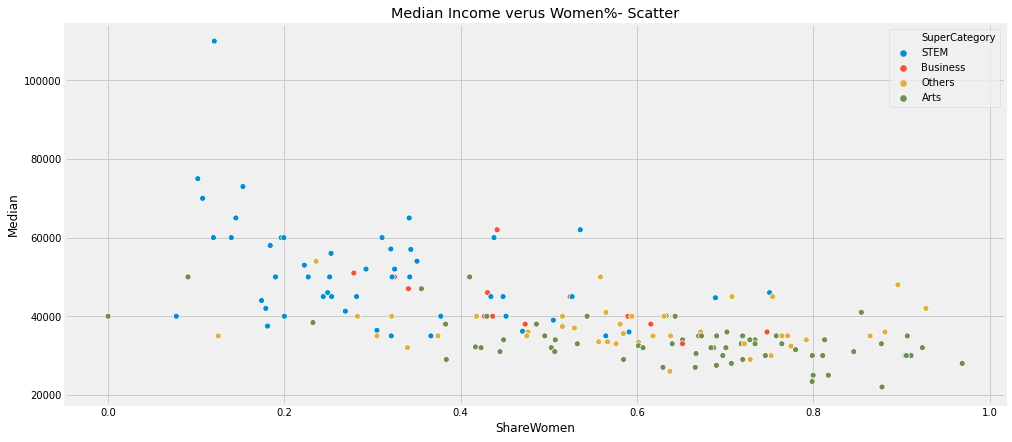

In [98]:
import seaborn as sns
plt.figure(figsize=(15,7))
plt.title('Median Income verus Women%- Scatter')
sns.scatterplot(data=df1, x='ShareWomen',y='Median', hue='SuperCategory')

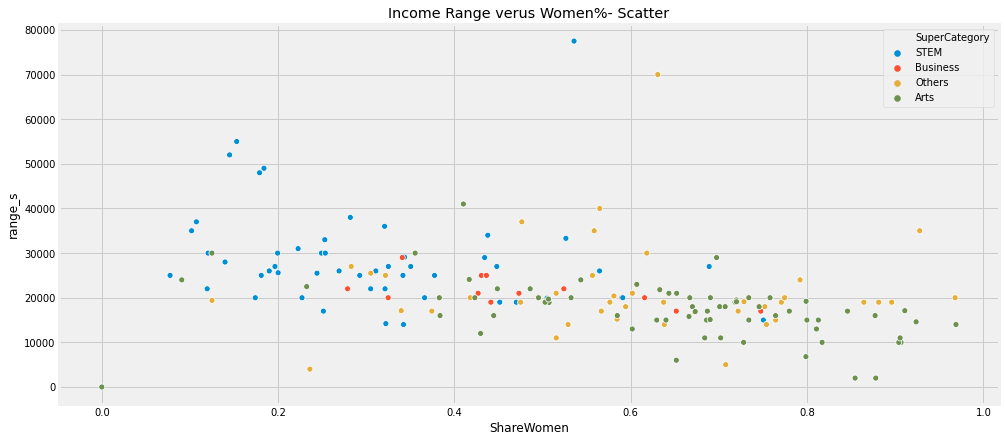

In [160]:
plt.figure(figsize=(15,7))
plt.title('Income Range verus Women%- Scatter')

sns.scatterplot(data=df1, x='ShareWomen',y='range_s', hue='SuperCategory',)

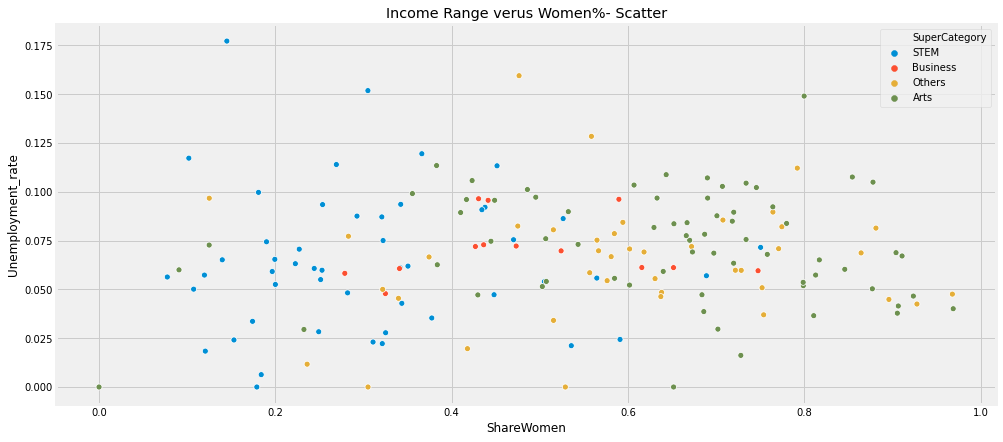

In [161]:
plt.figure(figsize=(15,7))
plt.title('Income Range verus Women%- Scatter')

sns.scatterplot(data=df1, x='ShareWomen',y='Unemployment_rate', hue='SuperCategory',)

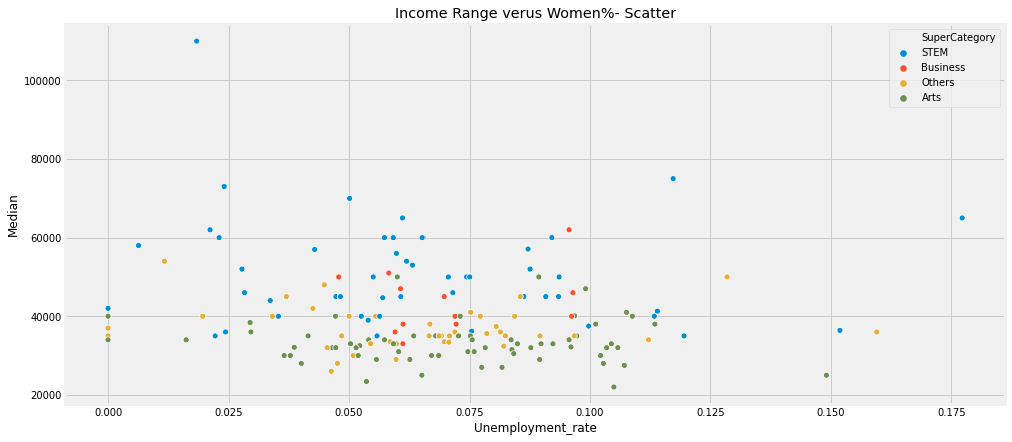

In [162]:
plt.figure(figsize=(15,7))
plt.title('Income Range verus Women%- Scatter')

sns.scatterplot(data=df1, x='Unemployment_rate',y='Median', hue='SuperCategory',)

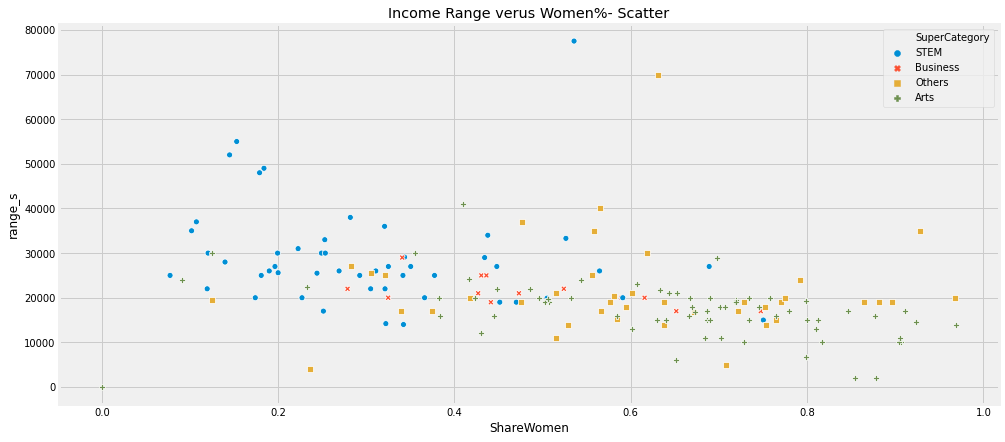

In [117]:
plt.figure(figsize=(15,7))
plt.title('Income Range verus Women%- Scatter')

sns.scatterplot(data=df1, x='ShareWomen',y='range_s',hue='SuperCategory', style='SuperCategory')

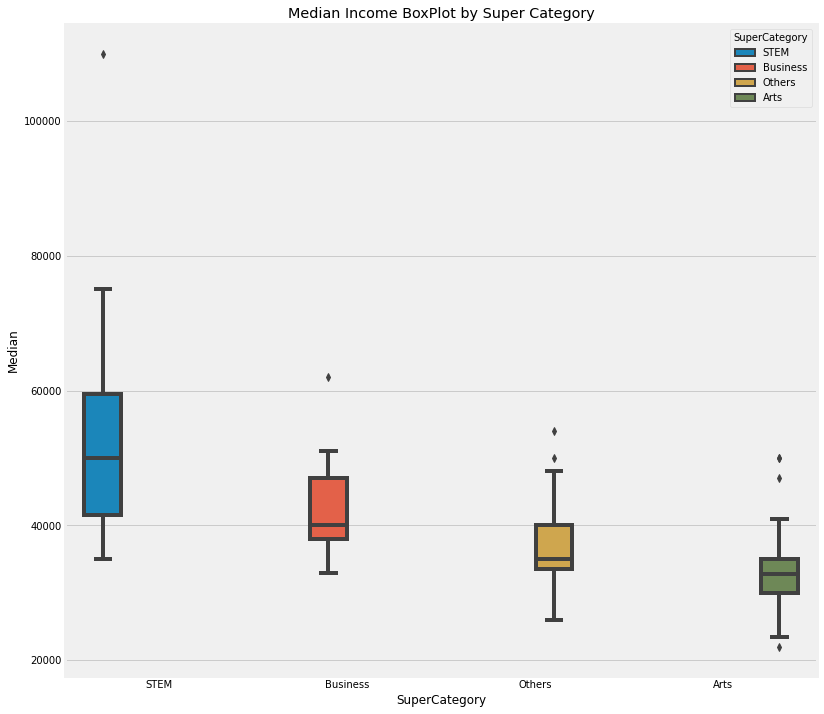

In [100]:
plt.figure(figsize=(12,12))
plt.title('Median Income BoxPlot by Super Category')
sns.boxplot(data=df1, x='SuperCategory',y='Median', hue='SuperCategory')

In [130]:
def multi(x,y):
  return(x*y)

In [131]:
df1['wt_Median'] = df1.apply(lambda x: multi(x.Sample_size, x.Median), axis=1)
df1['wt_P25th'] = df1.apply(lambda x: multi(x.Sample_size, x.P25th), axis=1)
df1['wt_P75th'] = df1.apply(lambda x: multi(x.Sample_size, x.P75th), axis=1)

In [136]:
df2=df1.groupby('SuperCategory')['Total','Men','Women','Sample_size','Unemployed','wt_P25th', 'wt_P75th','wt_Median'].sum()
df2['Median']= df2.wt_Median/df2.Sample_size
df2['P25th']= df2.wt_P25th/df2.Sample_size
df2['P75th']= df2.wt_P75th/df2.Sample_size
df2['MenShare']= df2.Men/df2.Total
df2['WomenShare']= df2.Women/df2.Total
df2['Unemployed%']= df2.Unemployed/df2.Total

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


# Findings

*   STEM has the higest median salary and as well the largest spread
*   Major's with > 40% of WomenShare has the largest share of unemployed
*   Major Super Categories such as Arts and Others have lower compensation ranges in the range of $40000 but not much correlation with unemployment rate
*   Women participation in majors such as mats, stats, business, social sciences, architecture is more or very similar compared to Men






